In [13]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pandas as pd
import os

In [14]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!unzip /content/drive/MyDrive/COCO2014ValDemographicAnnotations-20221202T083559Z-001.zip

Archive:  /content/drive/MyDrive/COCO2014ValDemographicAnnotations-20221202T083559Z-001.zip
  inflating: COCO2014ValDemographicAnnotations/README.pdf  
  inflating: COCO2014ValDemographicAnnotations/images_val2014.csv  
  inflating: COCO2014ValDemographicAnnotations/instances_2014all.csv  


In [17]:
df = pd.read_csv('/content/COCO2014ValDemographicAnnotations/images_val2014.csv')

In [18]:
df.sample(10)

,id,skin,ratio,bb_skin,bb_gender,split
14288,153529,"['Light', 'Light', 'Unsure']","[0.25823879899999996, 0.055480325999999996, 0....",Light,Female,val
192,7873,"['Light', 'Dark', 'Dark', 'Dark']","[0.02657347775175644, 0.36697892271662763, 0.1...",Dark,Female,train
7958,335785,"['Light', 'Light', 'Light']","[0.09280081775700935, 0.20197867990654206, 0.0...",Light,Male,train
4298,183456,['Light'],[0.10640533333333334],Light,Female,train
6301,267076,['Light'],[0.34383498953974895],Light,Unsure,train
15329,450686,['Light'],[0.516298231],Light,Male,val
14499,210032,['Light'],[0.047496601],Light,Female,val
11309,477780,['Light'],[0.1639740566037736],Light,Unsure,train
9095,384038,['Light'],[0.03453125],Light,Male,train
577,22801,['Light'],[0.37866656908665103],Light,Female,train


In [19]:
df.describe()

,id
count,15762.000000
mean,291073.385103
std,167921.637049
min,136.000000
25%,147033.250000
50%,292421.500000
75%,437198.750000
max,581886.000000


In [20]:
df_f = df[df['split'] == 'train']

In [21]:
df_f.sample(20)

,id,skin,ratio,bb_skin,bb_gender,split
7947,335374,['Light'],[0.20847701149425288],Light,Male,train
8115,342521,"['Light', 'Light']","[0.05038235294117647, 0.1285110294117647]",Light,Male,train
8751,368836,"['Light', 'Light']","[0.019736328125, 0.18992513020833332]",Light,Male,train
10435,441736,"['Dark', 'Dark', 'Dark']","[0.05256901840490798, 0.05133243865030675, 0.0...",Dark,Male,train
6449,273909,"[nan, 'Light']","[0.05634191176470588, 0.05535661764705883]",NaN,NaN,train
1831,77596,"[nan, nan]","[0.07668909143518518, 0.06608072916666667]",NaN,Both,train
6871,291606,['Dark'],[0.07010334645669292],Dark,Female,train
8156,344364,['Light'],[0.10059459459459459],Light,Male,train
6519,277717,[nan],[0.1721415011682243],NaN,Male,train
13599,574103,[nan],[0.12396077283372366],NaN,Unsure,train


In [22]:
id = df_f['id'] 
tone = df_f['bb_skin']

In [23]:
#!unzip -q '/content/drive/MyDrive/annotations_trainval2014.zip'

In [24]:
!unzip -q '/content/drive/MyDrive/annotations_trainval2017 (2).zip'

In [25]:
coco = COCO('/content/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=15.90s)
creating index...
index created!


In [26]:
imgIds=sorted(coco.getImgIds())
imgId = imgIds[np.random.randint(100)]

In [27]:
len(imgIds)

118287

In [28]:
type(imgIds)

list

In [29]:
imgIds[1]

25

In [30]:
imgId = imgIds[1]

In [31]:
img = coco.loadImgs(imgId)

In [32]:
img

[{'license': 1,
  'file_name': '000000000025.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000000025.jpg',
  'height': 426,
  'width': 640,
  'date_captured': '2013-11-16 14:11:30',
  'flickr_url': 'http://farm1.staticflickr.com/94/241612385_d9e5b891ed_z.jpg',
  'id': 25}]

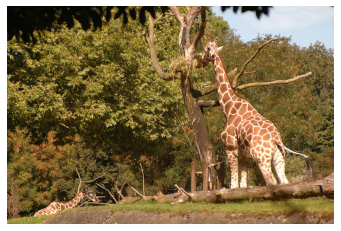

In [33]:
I = io.imread(img[0]['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [34]:
from pycocotools.coco import COCO

In [35]:
id_c = img[0]['id']

In [36]:
category_ids = coco.getCatIds()

In [37]:
# Category IDs.
coco_annotation = coco
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

# Category ID -> Category Name.
query_id = cat_ids[23]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted

In [38]:
z = zip(cat_ids,cat_names)

In [39]:
map = {}
for (x,y) in z:
  map[x] = y

In [40]:
map

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [41]:
cat_names[25]

'umbrella'

In [42]:
annIds = coco.getAnnIds(imgIds=id_c, catIds=category_ids)
annIds
anns = coco.loadAnns(annIds)
# coco.showAnns(anns)
# annsc = anns['category_id'] 

In [43]:
map[anns[0]['category_id']]

'giraffe'

In [44]:
id_list = []

for x in id:
  id_list.append(x)

In [45]:
id_list = id_list[0:1000]

In [46]:
# id_list

In [47]:
len(id_list)

1000

In [48]:
# id_list

In [49]:
#=========OLD IMG LIST================#
# img_list = []

# for x in id_list:
#   img = coco.loadImgs(x)
#   I = io.imread(img[0]['coco_url'])
#   img_list.append(I)

In [50]:
Ydual_pred = []
img_list= []

for x in id_list:
  annIds = coco.getAnnIds(imgIds=x, catIds=category_ids)
  anns = coco.loadAnns(annIds)
  Ydual_pred.append(anns[0]['category_id'])
  img = coco.loadImgs(x)
  I = io.imread(img[0]['coco_url'])
  img_list.append(I)

In [51]:
# Ydual_pred

In [52]:
img_list[0]

array([[[ 12,  16,  17],
        [  9,  13,  14],
        [ 12,  16,  17],
        ...,
        [ 24,  23,  21],
        [ 26,  25,  23],
        [ 26,  25,  23]],

       [[ 10,  14,  15],
        [  8,  12,  13],
        [ 12,  16,  17],
        ...,
        [ 31,  30,  25],
        [ 33,  33,  25],
        [ 34,  34,  26]],

       [[  9,  13,  14],
        [  8,  12,  13],
        [ 11,  15,  16],
        ...,
        [ 38,  40,  29],
        [ 39,  41,  30],
        [ 40,  42,  31]],

       ...,

       [[ 35,  54, 148],
        [ 38,  57, 151],
        [ 40,  59, 153],
        ...,
        [215, 197, 183],
        [213, 195, 181],
        [220, 202, 188]],

       [[ 38,  57, 152],
        [ 38,  57, 152],
        [ 37,  56, 151],
        ...,
        [214, 196, 182],
        [211, 193, 179],
        [218, 200, 186]],

       [[ 41,  59, 157],
        [ 41,  60, 155],
        [ 39,  58, 153],
        ...,
        [221, 203, 189],
        [218, 200, 186],
        [224, 206, 192]]

In [53]:
len(img_list)

1000

In [54]:
type(img_list)

list

In [55]:
import numpy as np

In [56]:
img_arr = np.array(img_list, dtype='object')

In [57]:
# np.save('img_coco.npy', img_arr, allow_pickle=True) # save
# img_arr_loaded = np.load('img_coco.npy', allow_pickle=True) # load

In [58]:
img_arr.shape 

(1000,)

In [59]:
# img_arr_loaded.shape

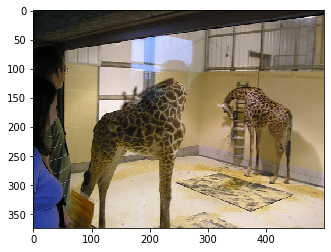

In [60]:
from matplotlib import pyplot as plt
plt.imshow(img_arr[0], interpolation='nearest')
plt.show()

In [61]:
#!cp img_coco.npy /content/drive/MyDrive/

In [62]:
!ls -l --block-size=M

total 1M
drwxr-xr-x 2 root root 1M Dec  4 05:31 annotations
drwxr-xr-x 2 root root 1M Dec  4 05:30 COCO2014ValDemographicAnnotations
drwx------ 5 root root 1M Dec  4 05:30 drive
drwxr-xr-x 1 root root 1M Dec  1 20:08 sample_data


In [63]:
y_list = []
for x in tone:
  if x=='Dark':
    y_list.append(1)
  if x=='Light':
    y_list.append(0)

In [64]:
#y_arr = np.array(y_list)
y_arr = y_list

In [65]:
# y_arr

In [66]:
y_arr = y_arr[0:1000]

In [67]:
multilabel_y = list(zip(Ydual_pred,y_arr))

In [68]:
# for x in multilabel_y:
#   print(x[0])

In [69]:
import random

X = []
y = []

def pet(dualpreds, X, y):
  for x in dualpreds:
    temp = []
    temp.append(x[0])
    y.append(x[1])
    for i in range(5):
      temp.append(random.randint(0,79))
    X.append(temp)
  
  return X,y

dl_x, dl_y = pet(multilabel_y, X,y)
print(X)
print(y)

[[1, 19, 4, 62, 40, 16], [1, 35, 29, 63, 13, 3], [44, 16, 19, 75, 49, 22], [1, 50, 65, 75, 56, 27], [77, 77, 58, 72, 8, 38], [82, 63, 72, 23, 42, 47], [77, 28, 0, 23, 11, 38], [62, 71, 38, 6, 57, 0], [43, 32, 39, 44, 49, 57], [32, 68, 33, 71, 23, 4], [32, 17, 41, 38, 8, 28], [1, 18, 38, 2, 45, 5], [37, 68, 17, 41, 73, 21], [62, 49, 46, 55, 15, 77], [37, 26, 26, 35, 78, 41], [1, 10, 61, 44, 17, 33], [34, 48, 33, 21, 67, 72], [15, 2, 30, 52, 34, 29], [90, 58, 40, 49, 2, 17], [1, 22, 11, 30, 36, 54], [35, 38, 61, 69, 6, 27], [34, 4, 38, 19, 69, 47], [1, 14, 75, 30, 33, 3], [43, 77, 53, 35, 58, 79], [37, 31, 75, 21, 60, 77], [1, 46, 57, 48, 29, 38], [1, 71, 27, 34, 39, 10], [32, 23, 9, 1, 70, 79], [32, 57, 67, 46, 62, 75], [32, 42, 53, 48, 26, 7], [1, 65, 25, 13, 29, 13], [62, 78, 78, 18, 40, 1], [1, 3, 52, 54, 27, 62], [1, 12, 52, 55, 53, 68], [62, 75, 77, 50, 57, 32], [5, 63, 56, 61, 40, 19], [1, 20, 79, 38, 62, 49], [17, 53, 68, 24, 6, 31], [63, 28, 5, 15, 27, 15], [63, 5, 41, 60, 57, 7

In [70]:
# Dataset Leakage
from sklearn.linear_model import LogisticRegression

In [71]:
X_ = np.array(X)
y_ = np.array(y)

In [72]:
X_.shape, y_.shape

((1000, 6), (1000,))

In [73]:
for lb in y_:
  if np.random.randint(1,10)==5:
    if y_[0] == 1:
      y_[0] = 0
    else:
      y_[1] = 1

In [74]:
clf = LogisticRegression(C=1000, random_state=42, max_iter=100).fit(X_, y_)
clf.score(X_, y_)

0.901

In [75]:
# from sklearn import svm
# clf = svm.SVC(C=1000, random_state=42)
# clf.fit(X_, y_)
# clf.score(X_,y_)

In [76]:
len(multilabel_y)

1000

In [77]:
len(y_arr)

1000

In [78]:
# for i in range(len(img_arr)):
#   print(id[i])

In [79]:
dictv = {}

for x,y in zip(id_list, y_list):
  dictv[x] = y

In [80]:
len(dictv)

1000

In [81]:
img_arr_rn = img_arr

In [82]:
type(img_arr_rn[0])

numpy.ndarray

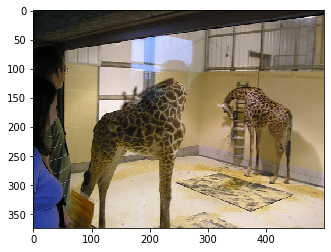

In [83]:
from matplotlib import pyplot as plt
plt.imshow(img_arr_rn[0], interpolation='nearest')
plt.show()

In [84]:
len(img_arr_rn)

1000

In [85]:
type(img_arr_rn)

numpy.ndarray

In [86]:
img_arr_rn[0]

array([[[ 12,  16,  17],
        [  9,  13,  14],
        [ 12,  16,  17],
        ...,
        [ 24,  23,  21],
        [ 26,  25,  23],
        [ 26,  25,  23]],

       [[ 10,  14,  15],
        [  8,  12,  13],
        [ 12,  16,  17],
        ...,
        [ 31,  30,  25],
        [ 33,  33,  25],
        [ 34,  34,  26]],

       [[  9,  13,  14],
        [  8,  12,  13],
        [ 11,  15,  16],
        ...,
        [ 38,  40,  29],
        [ 39,  41,  30],
        [ 40,  42,  31]],

       ...,

       [[ 35,  54, 148],
        [ 38,  57, 151],
        [ 40,  59, 153],
        ...,
        [215, 197, 183],
        [213, 195, 181],
        [220, 202, 188]],

       [[ 38,  57, 152],
        [ 38,  57, 152],
        [ 37,  56, 151],
        ...,
        [214, 196, 182],
        [211, 193, 179],
        [218, 200, 186]],

       [[ 41,  59, 157],
        [ 41,  60, 155],
        [ 39,  58, 153],
        ...,
        [221, 203, 189],
        [218, 200, 186],
        [224, 206, 192]]

In [87]:
from torchvision import transforms

tr = transforms.Compose([
        transforms.Resize([224,224]),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

In [88]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class SingDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.Tensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
targets = y_arr
dataset = SingDataset(data, targets, transform=tr)
dataloader = DataLoader(dataset, batch_size=4)

In [89]:
len(dataset)

1000

In [90]:
next(iter(dataset))

(tensor([[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
          [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
          [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
          ...,
          [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
          [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
          [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
         [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
          [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
          [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
          ...,
          [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
          [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
          [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
         [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
          [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
          [0.0588, 0.0667, 0.0745,  ...,

In [91]:
v = [(1,2),(3,4)]
v = torch.tensor(v)
print(v[0])

tensor([1, 2])


In [92]:
for x in multilabel_y:
  if x[0]>82:
    print(x[0])

90
85
85
86
85
90
90
90
85
89
90
90
88
90
89
85
85
90
90


In [93]:
# y = 4
# g = 1
# arre = np.zeros(82)
# arre[y-1] = 1
# if g==1:
#   arre[81] = 1
# else:
#   arre[80] = 1
# print(arre)

def encode(multilabel_y):
  res = []
  for x in multilabel_y:
    temp_arr = np.zeros(90)
    temp_arr[x[0]-1] = 1
    if(x[1]):
      temp_arr[81] = 1
    else:
      temp_arr[80] = 1
    res.append(temp_arr)

  return res

res = encode(multilabel_y) 
res = np.array(res)
print(res) 
ye = res

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [94]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class MultiDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.Tensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
# targets_m = multilabel_y
targets_m = ye
dataset_m = MultiDataset(data, targets_m, transform=tr)
dataloader_m = DataLoader(dataset_m, batch_size=4)

In [83]:
# activation = {}
# def get_activation(name):
#     def hook(model, input, output):
#         activation[name] = output.detach()
#     return hook

In [95]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# tensor_x = torch.Tensor(img_arr_rn) # transform to torch tensor
# tensor_y = torch.Tensor(y_arr)
# tensor_x = tensor_x.reshape([10,3,224,224])

In [85]:
# dataset = TensorDataset(tensor_x,tensor_y) # create your datset
# dataloader = DataLoader(dataset) # create your dataloader

In [86]:
# tensor_x.shape

In [87]:
# tensor_x[0].shape

In [88]:
# v = tensor_x[0].numpy().transpose(1,2,0)
# plt.imshow(v)

In [89]:
len(dataset)

1000

In [90]:
next(iter(dataset))

(tensor([[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
          [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
          [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
          ...,
          [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
          [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
          [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
         [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
          [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
          [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
          ...,
          [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
          [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
          [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
         [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
          [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
          [0.0588, 0.0667, 0.0745,  ...,

In [91]:
next(iter(dataset_m))

(tensor([[[0.0431, 0.0471, 0.0588,  ..., 0.1020, 0.1020, 0.1137],
          [0.0353, 0.0510, 0.0549,  ..., 0.1373, 0.1412, 0.1451],
          [0.0392, 0.0471, 0.0549,  ..., 0.1294, 0.1216, 0.1137],
          ...,
          [0.1451, 0.1490, 0.1529,  ..., 0.8471, 0.8431, 0.8471],
          [0.1451, 0.1490, 0.1451,  ..., 0.8471, 0.8392, 0.8431],
          [0.1569, 0.1490, 0.1529,  ..., 0.8549, 0.8510, 0.8549]],
 
         [[0.0588, 0.0627, 0.0745,  ..., 0.1020, 0.0980, 0.1098],
          [0.0510, 0.0667, 0.0706,  ..., 0.1412, 0.1451, 0.1490],
          [0.0549, 0.0627, 0.0706,  ..., 0.1294, 0.1255, 0.1176],
          ...,
          [0.2196, 0.2235, 0.2275,  ..., 0.7765, 0.7725, 0.7765],
          [0.2196, 0.2235, 0.2196,  ..., 0.7765, 0.7686, 0.7725],
          [0.2275, 0.2235, 0.2275,  ..., 0.7843, 0.7804, 0.7843]],
 
         [[0.0627, 0.0667, 0.0784,  ..., 0.0863, 0.0824, 0.0941],
          [0.0549, 0.0706, 0.0745,  ..., 0.1020, 0.1098, 0.1137],
          [0.0588, 0.0667, 0.0745,  ...,

In [92]:
i,o = next(iter(dataset))
np.max(i.numpy())

1.0

In [93]:
c = i.numpy()
c = (c * 255).astype(np.uint8)
print(c)

[[[ 11  12  15 ...  26  26  29]
  [  9  13  14 ...  35  36  37]
  [ 10  12  14 ...  33  31  29]
  ...
  [ 37  38  39 ... 216 215 216]
  [ 37  38  37 ... 216 214 215]
  [ 40  38  39 ... 218 217 218]]

 [[ 15  16  19 ...  26  25  28]
  [ 13  17  18 ...  36  37  38]
  [ 14  16  18 ...  33  32  30]
  ...
  [ 56  57  58 ... 198 197 198]
  [ 56  57  56 ... 198 196 197]
  [ 58  57  58 ... 200 199 200]]

 [[ 16  17  20 ...  22  21  24]
  [ 14  18  19 ...  26  28  29]
  [ 15  17  19 ...  34  32  29]
  ...
  [148 150 152 ... 184 183 184]
  [150 151 149 ... 184 182 183]
  [154 151 150 ... 186 185 186]]]


In [94]:
# tensor_y.shape

In [96]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [97]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [98]:
dataset_sizes = len(dataset)
print(dataset_sizes)

1000


In [98]:
def train_model(model, criterion, optimizer, scheduler,  dataloader, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        #model.train()
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.type(torch.LongTensor)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase

            loss.backward()
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            scheduler.step()

        epoch_loss = running_loss / dataset_sizes
        epoch_acc = running_corrects.double() / dataset_sizes

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')    
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [99]:
from sklearn.metrics import hamming_loss
prob = torch.tensor([0.3,0.4,0.6,0.7])
out = (prob>0.5).float()
label = torch.tensor([0,0,1,1])
(1-hamming_loss(label, out))*100

100.0

In [100]:
model_ft_n = models.resnet18(pretrained=True)
num_ftrs = model_ft_n.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft_n.fc = nn.Sequential(nn.Dropout(0.1),
                         nn.Linear(model_ft_n.fc.in_features, 64),
                         nn.Linear(64, 2))
# model_ft_n.fc = nn.Linear(num_ftrs, 64)
# model_ft_n.fc1 = nn.Linear(64, 2)

model_ft_n = model_ft_n.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = torch.optim.SGD(model_ft_n.parameters(), lr=3e-4, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [101]:
# multilabel_y

In [102]:
m = map
mil = list(m.items())
mapL = []
for x in mil:
  tempL = []
  tl = list(x)
  tempL.append(tl[1])
  tempL.append(tl[0])
  mapL.append(tempL)

print(mapL)

[['person', 1], ['bicycle', 2], ['car', 3], ['motorcycle', 4], ['airplane', 5], ['bus', 6], ['train', 7], ['truck', 8], ['boat', 9], ['traffic light', 10], ['fire hydrant', 11], ['stop sign', 13], ['parking meter', 14], ['bench', 15], ['bird', 16], ['cat', 17], ['dog', 18], ['horse', 19], ['sheep', 20], ['cow', 21], ['elephant', 22], ['bear', 23], ['zebra', 24], ['giraffe', 25], ['backpack', 27], ['umbrella', 28], ['handbag', 31], ['tie', 32], ['suitcase', 33], ['frisbee', 34], ['skis', 35], ['snowboard', 36], ['sports ball', 37], ['kite', 38], ['baseball bat', 39], ['baseball glove', 40], ['skateboard', 41], ['surfboard', 42], ['tennis racket', 43], ['bottle', 44], ['wine glass', 46], ['cup', 47], ['fork', 48], ['knife', 49], ['spoon', 50], ['bowl', 51], ['banana', 52], ['apple', 53], ['sandwich', 54], ['orange', 55], ['broccoli', 56], ['carrot', 57], ['hot dog', 58], ['pizza', 59], ['donut', 60], ['cake', 61], ['chair', 62], ['couch', 63], ['potted plant', 64], ['bed', 65], ['dining 

In [103]:
sml_list = []
for x in list(m.values()):
  sml_tmp = []
  sml_tmp.append(x)
  sml_list.append(sml_tmp)

In [104]:
# sml_list

In [105]:
from sklearn.preprocessing import OneHotEncoder
enc_exp = OneHotEncoder(handle_unknown='ignore')
enc_exp.fit(mapL)
enc_exp.transform([['person', 1]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [106]:
# for x in multilabel_y:
#   print(x[0])

In [107]:
type(ye)

numpy.ndarray

In [108]:
sml_list[0]

['person']

In [109]:
from sklearn.preprocessing import OneHotEncoder
sml_arr = np.asarray(sml_list)
enc = OneHotEncoder(sparse=False)
onehot = enc.fit_transform(sml_list)
print(enc.transform([['person']]))
print(enc.inverse_transform([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
[['person']]


In [110]:
# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [111]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(mapL)
enc.transform([['person', 1], ['motorcycle', 4]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [112]:
model_ft_mn = models.resnet18(pretrained=True)

model_ft_mn.fc = nn.Sequential(nn.Dropout(0.1),
                         nn.Linear(model_ft_mn.fc.in_features, 256),
                         nn.Linear(256, 90))

model_ft_mn = model_ft_mn.to(device)

criterion_m = nn.BCEWithLogitsLoss()
# criterion_m = nn.CrossEntropyLoss()
# criterion_m = nn.BCELoss()

# Observe that all parameters are being optimized
#optimizer_ftm = optim.SGD(model_ft_mn.parameters(), lr=3e-4, momentum=0.9)
optimizer_ftm = torch.optim.Adam(model_ft_mn.parameters(), lr=3e-4)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler_m = lr_scheduler.StepLR(optimizer_ftm, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [113]:
model_ft_mn

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [114]:
CUDA_LAUNCH_BLOCKING=1

In [115]:
out = model_ft_mn(torch.rand(4,3,224,224).to(device))

In [116]:
torch.max(out.data,1)

torch.return_types.max(
values=tensor([0.9403, 0.7109, 0.7910, 0.9074]),
indices=tensor([66, 73, 29,  1]))

In [117]:
torch.max(out,1)

torch.return_types.max(
values=tensor([0.9403, 0.7109, 0.7910, 0.9074], grad_fn=<MaxBackward0>),
indices=tensor([66, 73, 29,  1]))

In [118]:
model_ft_n

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [119]:
model_ft_n.fc[2]

Linear(in_features=64, out_features=2, bias=True)

In [120]:
model_ft_n = train_model(model_ft_n, criterion, optimizer, exp_lr_scheduler, dataloader, num_epochs=10)

Epoch 0/9
----------
Train Loss: 0.5810 Acc: 0.7940

Epoch 1/9
----------


KeyboardInterrupt: ignored

In [ ]:
next(iter(dataloader))[0].shape

In [ ]:
from torch.autograd import Variable

activation_ = {}
def get_activation(name):
    def hook(model, input, output):
        activation_[name] = output.detach()
    return hook

logits = []

modelp = model_ft_n

modelp = modelp.to(device)
#modelp.layer4[1].conv1.register_forward_hook(get_activation('f1'))
modelp.fc[1].register_forward_hook(get_activation('f1p'))
# x = torch.randn(1,3,224,224)
x = next(iter(dataloader))
x = x[0]
x = x.to(device)
ml_y = x[1]
output = modelp(x)
print(output)
# for i,l in dataloader:
#   print(l)
#   print()
#   print(len(activation['f1']))
#   output = modelp(i)
#   # output = torch.randn(5,224,224,3)
#   logits.append(output)

In [ ]:
modelp.fc

In [ ]:
activation_.keys()

In [ ]:
activation_['f1p'].shape

In [ ]:
activation_['f1p'][0].shape

In [ ]:
# ml = activation_['f1']
# ml = ml.reshape(4,-1)
# print(ml.shape)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
            # nn.Softmax(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

In [ ]:
y_arr = np.array(y_arr)

In [ ]:
# y_arr

In [ ]:
activation_ml = {}

dataloader_modelleakage = DataLoader(dataset_m, batch_size=128)

def get_activation_mn(name):
    def hook(model, input, output):
        #print(model)
        activation_ml[name] = output.detach()
    return hook

logits = []

modelm = model_ft_mn

modelm = modelm.to(device)
modelm.fc[1].register_forward_hook(get_activation_mn('mf1'))
# model_ft_mn.layer1[0].conv2
# modelm.fc[1].register_forward_hook(get_activation_mn('mf1'))
x = next(iter(dataloader_modelleakage))
x = x[0]
x = x.to(device)
ml_y = x[1]
output = modelm(x)
print(output)

In [ ]:
modelm.fc[1]

In [ ]:
model_ft_mn.layer1[0].conv2

In [ ]:
activation_ml

In [ ]:
activation_ml['mf1'].shape

In [ ]:
dl = activation_ml['mf1']

In [ ]:
print(dl.shape)
tensor_x = dl
tensor_y = torch.tensor(y_arr)[:128]
print(tensor_x.shape)
print(tensor_y.shape)

In [ ]:
tensor_y

In [ ]:
#tensor_x = tensor_x.long()

In [ ]:
tensor_x.dtype

In [ ]:
tensor_x.shape, tensor_y.shape

In [ ]:
tensor_y = tensor_y.type(torch.FloatTensor)

In [ ]:
# tensor_y = tensor_y.long()

In [ ]:
tensor_y.dtype

In [ ]:
type(tensor_y)

In [ ]:
tensor_y

In [ ]:
datasetml_atv = TensorDataset(tensor_x,tensor_y) # create your datset
dataloader_ml_atv = DataLoader(datasetml_atv, batch_size=2) # create your dataloader

In [ ]:
# for x,y in dataloader_ml_atv:
#   print(x.shape,y.shape)

In [ ]:
next(iter(dataloader_ml_atv))

In [ ]:
learning_rate = 3e-4
# batch_size = 4
epochs = 10

# Initialize the loss function
# loss_fn = nn.CrossEntropyLoss()

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train(dataloader, model, loss_fn, optimizer):
    acc = 0
    size = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.long()
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        #print("Pred is:",pred)
        acc += (torch.softmax(pred, dim=1).argmax(dim=1) == y).sum().float()
        acc = acc.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #running_accuracy += accuracy(pred, y)
        #print("Size is:",size)
        #print("Running Acc:",acc/size)

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    return acc   

# def train_loop(dataloader, model, loss_fn, optimizer):
#     size = len(dataloader.dataset)
#     for batch, (X, y) in enumerate(dataloader):
#         # Compute prediction and loss
#         pred = model(X)
#         loss = loss_fn(pred, y)

#         # Backpropagation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         if batch % 100 == 0:
#             loss, current = loss.item(), batch * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# def test_loop(dataloader, model, loss_fn):
#     size = len(dataloader.dataset)
#     num_batches = len(dataloader)
#     test_loss, correct = 0, 0

#     with torch.no_grad():
#         for X, y in dataloader:
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()

#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
activation_ml['mf1']

In [ ]:
# loss_f = nn.BCELoss()
loss_f = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
correct = 0

epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    c = train(dataloader_ml_atv, model, loss_f, optim)
    accuracy = 100 * c / len(datasetml_atv)
    print("Accuracy is:",accuracy)
    # test_loop(test_dataloader, model, loss_fn)
print("Done!")

In [ ]:
len(activation_['f1p'])

In [ ]:
len(activation_['f1p'][1])

In [ ]:
ye.shape

In [ ]:
next(iter(dataloader_m))

In [ ]:
def train_model_ml(model, criterion, optimizer, scheduler,  dataloader, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        #model.train()
        running_loss = 0.0
        running_corrects = 0
        hl = 0

        # Iterate over data.
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            # track history if only in train
            outputs = model(inputs)
            #_, preds = torch.max(outputs, 1)
            # print(f'Pred:{outputs}')
            # print(f'LD:{labels}')
            loss = criterion(outputs, labels)

            # backward + optimize only if in training phase

            loss.backward()
            optimizer.step()

            pred = torch.nn.Sigmoid()(outputs)
            # print("Pred is",pred)
            # print("Labels are:",labels)
            pred_t = pred.cpu()
            pred_t = (pred>0.5)
            hl+=hamming_loss(labels.cpu(), pred_t.cpu())
            

            # statistics
            running_loss += loss.item() * inputs.size(0)
            #running_corrects += torch.sum(preds.data == labels.data)
            # print(outputs,labels)
            scheduler.step()

        epoch_loss = running_loss/dataset_sizes
        # epoch_acc = running_corrects.double() / dataset_sizes
        # epoch_acc = running_corrects / dataset_sizes

        #print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}') 
        hlm = hl/dataset_sizes
        acc = (1-hlm)*100 
        print(f'Train Loss: {epoch_loss:.4f}')   
        print(f'Accuracy: {acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft_mn = train_model_ml(model_ft_mn, criterion_m, optimizer_ftm, exp_lr_scheduler_m, dataloader_m, num_epochs=10)

In [ ]:
for xb, yb in dataloader_m:
  print(xb.shape)
  print(yb.shape)
  break

In [ ]:
class_names = {1:'Dark', 0:'Light'}
classes=['Dark','Light']

In [ ]:
inputs, classes = next(iter(dataloader))
inputs = inputs[2]
inp = inputs
print(inp.shape)
inp = inp.numpy().transpose((1, 2, 0))
print(inp.shape, inputs.shape)
ci = (inp * 255).astype(np.uint8)
plt.imshow(ci)

In [ ]:
classes

In [ ]:
# inp = inp.transpose(1,2,)
# plt.imshow(inp, interpolation='nearest')
# plt.show()

In [ ]:
class_names

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = (inp * 255).astype(np.uint8)
    #print(inp.shape)
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # inp = std * inp + mean
    # inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out)

In [ ]:
def visualize_model(model, num_images=16):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            print(labels)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            print(preds)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'Predicted: {class_names[preds[j].item()]} | Label:{labels.cpu().data[j]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
visualize_model(model_ft_n)

In [6]:
!pip install pytorch_revgrad
from pytorch_revgrad import RevGrad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
resnet = models.resnet18(pretrained=True)

# for param in resnet.parameters():
#   param.requires_grad = False

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
class BM(nn.Module):
    def __init__(self, resnet):
        super(BM,self).__init__()
        # Loading pretrained model

        #self.resnet = models.resnet18(pretrained=True)

        #self.resnetft = torch.nn.Sequential(*(list(self.resnet.children())[:-1]))

        self.resnet = resnet

        self.branchadv = nn.Sequential(nn.Flatten(),
                        nn.Dropout(0.1),
                         nn.Linear(512, 64),
                         nn.Linear(64,2),
                         RevGrad())

        
        self.branchtask = nn.Sequential(nn.Flatten(),
                         nn.Dropout(0.1),
                         nn.Linear(512, 256),
                         nn.Linear(256, 91))


 
    def forward(self,x):
        x = self.resnet(x)
        adv = self.branchadv(x)
        task = self.branchtask(x)
        return adv, task


res_ft = torch.nn.Sequential(*(list(resnet.children())[:-1]))
modelbm = BM(res_ft)
modelbm.to(device)

In [ ]:
from torchsummary import summary
# m  = models.resnet18(pretrained=True)
modelbm.to(device)
summary(modelbm,(3,224,224))

In [ ]:
modelbm.branchadv

In [100]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image


class BmDataset(Dataset):
    def __init__(self, data, target1, target2, transform=None):
        self.data = data
        self.target1 = torch.Tensor(target1)
        self.target2 = torch.Tensor(target2)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y1 = self.target1[index]
        y2 = self.target2[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index],'RGB')
            x = self.transform(x)
        
        return x, y1, y2
    
    def __len__(self):
        return len(self.data)

data = img_arr_rn
yc = np.array(Ydual_pred)
target1 = yc
target2 = y_arr
datasetbm = BmDataset(data, target1, target2, transform=tr)
dataloaderbm = DataLoader(datasetbm, batch_size=4)

In [ ]:
# next(iter(dataloaderbm))

In [125]:
for x,y1,y2 in dataloaderbm:
  print(x.shape,y1.shape,y2.shape)
  break

torch.Size([4, 3, 224, 224]) torch.Size([4]) torch.Size([4])


In [126]:
# model = models.resnet18(pretrained=True)
# newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))
# print(newmodel)

In [128]:
out1, out2 = modelbm(torch.randn(4,3,224,224).to(device))
print(out1.shape,out2.shape)

In [ ]:
# criterion_bm = nn.CrossEntropyLoss()
# optimizer_bm_task = torch.optim.Adam(modelbm.branchtask.parameters(), lr=3e-7)
# optimizer_bm_adv = torch.optim.Adam(modelbm.branchadv.parameters(), lr=3e-4)
# ds = len(datasetbm)

# def train_bm(model, criterion, opt1, opt2, dataloader, lamda, num_epochs=25):
#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0

#     for epoch in range(num_epochs):
#         print(f'Epoch {epoch}/{num_epochs - 1}')
#         print('-' * 10)
#         running_loss = 0.0
#         running_corrects = 0

#         # Iterate over data.
#         for inputs, label1, label2 in dataloader:
#             inputs = inputs.to(device)

#             label1 = label1.type(torch.LongTensor)
#             label1 = label1.to(device)

#             label2 = label2.type(torch.LongTensor)
#             label2 = label2.to(device)


#             # zero the parameter gradients
#             opt1.zero_grad()
#             opt2.zero_grad()

#             # forward
#             out_adv, out_task = modelbm(inputs)
#             loss_task = criterion(out_task, label1)
#             loss_adv = criterion(out_adv, label2)

#             # backward + optimize only if in training phase
#             print(loss_adv,loss_task)

#             loss = loss_adv - lamda*loss_task
#             #loss = loss_adv

#             loss.backward()
#             opt1.step()
#             opt2.step()

#             # statistics
#             _, preds = torch.max(out_task, 1)
#             # print("Predictions:",preds)
#             # print("Labels:",label1)
#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == label1.data)

#         epoch_loss = running_loss / ds
#         epoch_acc = running_corrects.double() / ds

#         print(f'Train Loss: {epoch_loss:.4f}')    
#         print(f'Train Accuracy: {epoch_acc:.4f}')  
#         print()

#     # load best model weights
#     model.load_state_dict(best_model_wts)
#     return model

In [ ]:
criterion_bm = nn.CrossEntropyLoss()
optimizer_bm = torch.optim.Adam(filter(lambda p: p.requires_grad, modelbm.parameters()), lr=3e-6)
ds = len(datasetbm)

def train_bm(model, criterion, opt, dataloader, lamda, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, label1, label2 in dataloader:
            inputs = inputs.to(device)

            label1 = label1.type(torch.LongTensor)
            label1 = label1.to(device)

            label2 = label2.type(torch.LongTensor)
            label2 = label2.to(device)


            # zero the parameter gradients
            opt.zero_grad()

            # forward
            out_adv, out_task = modelbm(inputs)
            loss_task = criterion(out_task, label1)
            loss_adv = criterion(out_adv, label2)

            # backward + optimize only if in training phase
            # print(loss_adv,loss_task)

            loss = loss_task - lamda*loss_adv
            #loss = loss_adv

            loss.backward()
            opt.step()

            # statistics
            _, preds = torch.max(out_task, 1)
            # print("Predictions:",preds)
            # print("Labels:",label1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == label1.data)

        epoch_loss = running_loss / ds
        epoch_acc = running_corrects.double() / ds

        print(f'Train Loss: {epoch_loss:.4f}')    
        print(f'Train Accuracy: {epoch_acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_bm_trained = train_bm(modelbm, criterion_bm, optimizer_bm, dataloaderbm, 0.5, num_epochs=100)
# model_bm_trained = train_bm(modelbm, criterion_bm, optimizer_bm_task, optimizer_bm_adv, dataloaderbm, 0.5, num_epochs=2)

In [ ]:
# m = BM(res_ft).to(device)
# O1,O2 = m(torch.randn(4,3,224,224).to(device))
# print(O1)

In [ ]:
# m

In [ ]:
# resnet = models.resnet18(pretrained=True)
# res_ft = torch.nn.Sequential(*(list(resnet.children())[0:9]))
# res_ft

In [ ]:
res_ft[7][0].conv2

In [ ]:
from torchsummary import summary
from torchvision.models import resnet18

resnet = resnet18(pretrained=True)
summary(resnet,(3,224,224))

In [ ]:
# class BM_mc(nn.Module):
#     def __init__(self):
#         super(BM_mc,self).__init__()

#         resnet = models.resnet18(pretrained=True)

#         self.rp1 = torch.nn.Sequential(*(list(resnet.children())[0:5]))

#         self.branchadv1 = nn.Sequential(nn.AdaptiveMaxPool2d((7,7)),
#                         nn.Flatten(),
#                         nn.Dropout(0.1),
#                          nn.Linear(3136,512),
#                          nn.Linear(512, 64),
#                          RevGrad())
        
#         self.rp2 = torch.nn.Sequential(*(list(resnet.children())[5:6]))

#         self.branchadv2 = nn.Sequential(nn.AdaptiveMaxPool2d((5,5)),
#                         nn.Flatten(),
#                         nn.Dropout(0.1),
#                          nn.Linear(3200,1024),
#                          nn.Linear(1024, 64),
#                          nn.Linear(512, 64),
#                          RevGrad())
        
#         self.rp3 = torch.nn.Sequential(*(list(resnet.children())[6:7]))
        
#         self.branchadv3 = nn.Sequential(nn.AdaptiveMaxPool2d((3,3)),
#                         nn.Flatten(),
#                         nn.Dropout(0.1),
#                          nn.Linear(2304,512),
#                          nn.Linear(512, 64),
#                          RevGrad())
        
#         self.fin_adv = nn.Linear(64,32)

#         self.rp4 = torch.nn.Sequential(*(list(resnet.children())[7:9]))

#         self.identity = torch.nn.Identity()
        
#         self.branchtask = nn.Sequential(nn.Flatten(),
#                          nn.Dropout(0.1),
#                          nn.Linear(512, 256),
#                          nn.Linear(256, 91))


#     def forward(self,x):
#         x = self.rp1(x)
#         x1 = self.branchadv1(x)
#         x = self.rp2(x)
#         x2 = self.branchadv2
#         x = self.rp3(x)
#         x3 = self.branchadv3(x)
#         x = self.rp4(x)
#         x1 = self.fin_adv(x1)
#         x2 = self.fin_adv(x2)
#         x3 = self.fin_adv(x3)
#         adv = torch.cat((x1,x2,x3),1)
#         task = self.branchtask(x)
#         return adv, task

# modelbm_mc = BM_mc()
# modelbm_mc.to(device)

In [129]:
class BM_mc(nn.Module):
    def __init__(self):
        super(BM_mc,self).__init__()

        resnet = models.resnet18(pretrained=True)
        
        self.rp1 = torch.nn.Sequential(*(list(resnet.children())[0:5]))
        self.pool1 = nn.AdaptiveMaxPool2d((7,7))
        self.flat1 = nn.Flatten()
        self.drop1 = nn.Dropout(0.1)
        self.linad1 = nn.Linear(3136,512)
        self.linear1 = nn.Linear(512, 64)
        self.fin_adv1 = nn.Linear(64,32)
        self.revg1 = RevGrad()
    
        self.rp2 = torch.nn.Sequential(*(list(resnet.children())[5:6]))
        self.pool2 = nn.AdaptiveMaxPool2d((5,5))
        self.flat2 = nn.Flatten()
        self.drop2 = nn.Dropout(0.1)
        self.linear3 = nn.Linear(3200,1024)
        self.linear4 = nn.Linear(1024, 64)
        self.fin_adv2 = nn.Linear(64,32)
        self.revg2 = RevGrad()
        
        self.rp3 = torch.nn.Sequential(*(list(resnet.children())[6:7]))
        self.pool3 = nn.AdaptiveMaxPool2d((3,3))
        self.flat3 = nn.Flatten()
        self.drop3 = nn.Dropout(0.1)
        self.linear5 = nn.Linear(2304,512)
        self.linear6 = nn.Linear(512, 64)
        self.fin_adv3 = nn.Linear(64,32)
        self.revg3 = RevGrad()

        self.rp4 = torch.nn.Sequential(*(list(resnet.children())[7:9]))

        self.flat4 = nn.Flatten()
        self.drop4 = nn.Dropout(0.1)
        self.linear7 = nn.Linear(512, 256)
        self.task = nn.Linear(256, 91)

        self.fc1 = nn.Linear(96,12)
        self.fc2 = nn.Linear(12,2)


    def forward(self,x):
        x = self.rp1(x)

        x1 = self.pool1(x)
        x1 = self.flat1(x1)
        x1 = self.drop1(x1)
        x1 = self.linad1(x1)
        x1 = self.linear1(x1)
        x1 = self.fin_adv1(x1)
        x1 = self.revg1(x1)

        x = self.rp2(x)
        x2 = self.pool2(x)
        x2 = self.flat2(x2)
        x2 = self.drop2(x2)
        x2 = self.linear3(x2)
        x2 = self.linear4(x2)
        x2 = self.fin_adv2(x2)
        x2 = self.revg2(x2)

        x = self.rp3(x)
        x3 = self.pool3(x)
        x3 = self.flat3(x3)
        x3 = self.drop3(x3)
        x3 = self.linear5(x3)
        x3 = self.linear6(x3)
        x3 = self.fin_adv3(x3)
        x3 = self.revg3(x3)

        task = self.rp4(x)
        task = self.flat4(task)
        task = self.drop4(task)
        task = self.linear7(task)
        task = self.task(task)


        # x2 = self.revg(self.fin_adv(self.linear4(self.linear3(self.drop(self.flat(self.pool2(x)))))))
        # x3 = self.revg(self.fin_adv(self.linear1(self.linear5(self.drop(self.flat(self.pool3(x)))))))
        # task = self.task(self.linear6(self.drop(self.flatten(x))))
        
        adv = torch.cat((x1,x2,x3),1)
        adv = self.fc1(adv)
        adv = self.fc2(adv)
        
        return adv, task

modelbm_mc = BM_mc()
modelbm_mc.to(device)

BM_mc(
  (rp1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [130]:
m = BM_mc().to(device)
O1, O2 = m(torch.randn(4,3,224,224).to(device))
print(O1.shape, O2.shape)

torch.Size([4, 2]) torch.Size([4, 91])


In [105]:
!pip install torchviz
from graphviz import Digraph
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=9919a51f092f66ad7b7a0a43874d28c9581c17164c9c28bc8e4d1e0e4847319d
  Stored in directory: /root/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


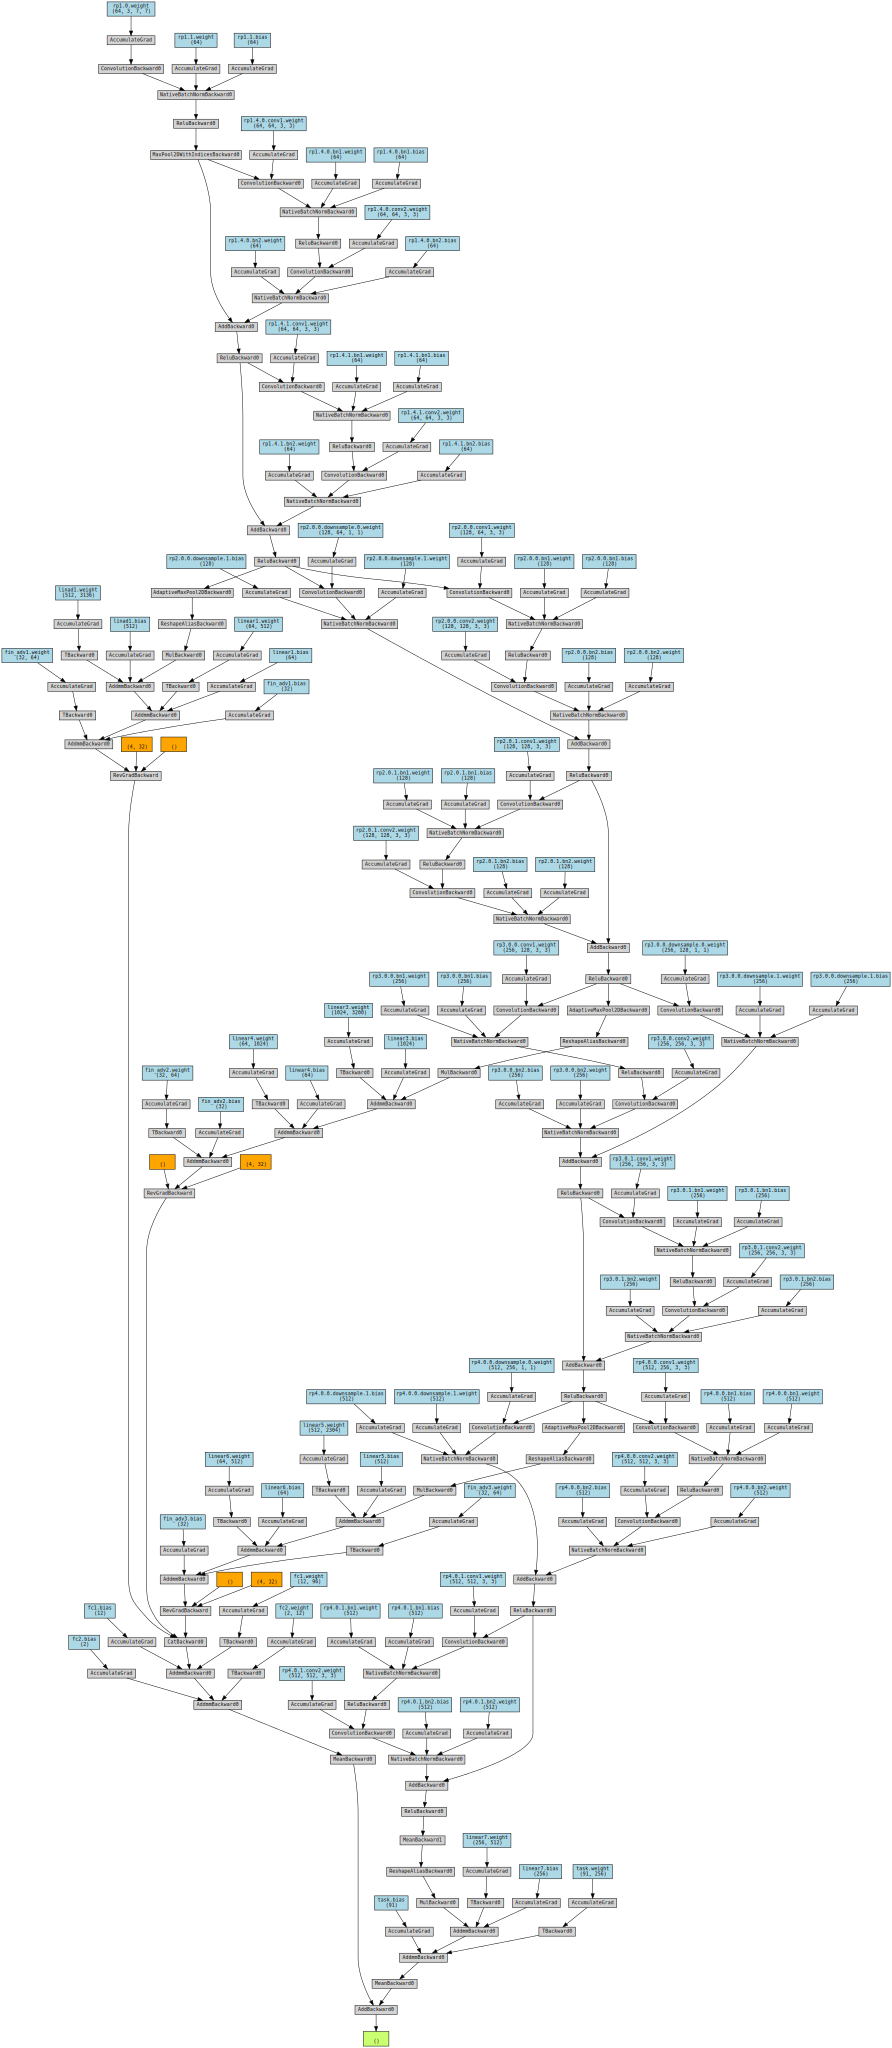

In [132]:
y = m(torch.randn(4,3,224,224).to(device))
make_dot(y[0].mean()+y[1].mean(), params=dict(m.named_parameters()))

In [133]:
from torchsummary import summary

modelbm_mc.to(device)
summary(modelbm_mc,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [134]:
x = torch.randn(32)
print(x.shape)
v1 = torch.cat((x, x, x), 0)
# v2 = torch.cat((x, x, x), 1)
print(v1.shape)
# print(v2.shape)


torch.Size([32])
torch.Size([96])


In [135]:
criterion_bm = nn.CrossEntropyLoss()
optimizer_bm = torch.optim.Adam(filter(lambda p: p.requires_grad, modelbm_mc.parameters()), lr=3e-6)
ds = len(datasetbm)

def train_bm_mc(model, criterion, opt, dataloader, lamda, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, label1, label2 in dataloader:
            inputs = inputs.to(device)

            label1 = label1.type(torch.LongTensor)
            label1 = label1.to(device)

            label2 = label2.type(torch.LongTensor)
            label2 = label2.to(device)


            # zero the parameter gradients
            opt.zero_grad()

            # forward
            out_adv, out_task = model(inputs)
            loss_task = criterion(out_task, label1)
            loss_adv = criterion(out_adv, label2)

            # backward + optimize only if in training phase
            # print(loss_adv,loss_task)

            loss = loss_task - lamda*loss_adv
            #loss = loss_adv

            loss.backward()
            opt.step()

            # statistics
            _, preds = torch.max(out_task, 1)
            # print("Predictions:",preds)
            # print("Labels:",label1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == label1.data)

        epoch_loss = running_loss / ds
        epoch_acc = running_corrects.double() / ds

        print(f'Train Loss: {epoch_loss:.4f}')    
        print(f'Train Accuracy: {epoch_acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [136]:
model_bm_mc_trained = train_bm_mc(modelbm_mc, criterion_bm, optimizer_bm, dataloaderbm, 0.5, num_epochs=10)

Epoch 0/9
----------
Train Loss: 4.2758
Train Accuracy: 0.0360

Epoch 1/9
----------
Train Loss: 3.6991
Train Accuracy: 0.3210

Epoch 2/9
----------
Train Loss: 3.2491
Train Accuracy: 0.3580

Epoch 3/9
----------
Train Loss: 2.9733
Train Accuracy: 0.3580

Epoch 4/9
----------
Train Loss: 2.8004
Train Accuracy: 0.3580

Epoch 5/9
----------
Train Loss: 2.6496
Train Accuracy: 0.3580

Epoch 6/9
----------
Train Loss: 2.5205
Train Accuracy: 0.3580

Epoch 7/9
----------
Train Loss: 2.4074
Train Accuracy: 0.3580

Epoch 8/9
----------
Train Loss: 2.2923
Train Accuracy: 0.3610

Epoch 9/9
----------
Train Loss: 2.1941
Train Accuracy: 0.3660



In [137]:
# !pip install torchviz
# !pip install hiddenlayer
# from graphviz import Digraph
# from torchviz import make_dot

In [138]:
batch = next(iter(dataloaderbm))

In [139]:
# import hiddenlayer as hl

# transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

# graph = hl.build_graph(modelbm_mc, batch, transforms=tr)
# graph.theme = hl.graph.THEMES['blue'].copy()
# graph.save('Check', format='png')

In [108]:
class BM_ae(nn.Module):
    def __init__(self, resnet):
        super(BM_ae,self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1), # -> N, 16, 112, 112
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2), # -> N, 16, 56, 56
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 28, 28
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2), # -> N, 32, 14, 14
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # -> N, 64, 7, 7
            nn.ReLU(),
            nn.Conv2d(64, 128, 7) # -> N, 128, 1, 1
        )

        self.flat1 = nn.Flatten()
        self.drop1 = nn.Dropout(0.1)
        self.lin1 = nn.Linear(128, 64)
        self.lin2 = nn.Linear(64,32)
        self.rg1 = RevGrad()

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 7), # -> N, 64, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 14, 14 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 28, 28 
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 56, 56 
            nn.ReLU(),
            nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 112, 112 
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1), # N, 3, 224, 224 
            nn.Sigmoid()
        )

        self.flat2 = nn.Flatten()
        self.drop2 = nn.Dropout(0.1)
        self.lin3 = nn.Linear(512, 64)
        self.lin4 = nn.Linear(64,32)
        self.rg2 = RevGrad()

        self.resnet = resnet

        
        self.branchtask = nn.Sequential(nn.Flatten(),
                         nn.Dropout(0.1),
                         nn.Linear(512, 256),
                         nn.Linear(256, 91))
        
        self.fc1 = nn.Linear(64,16)
        self.fc2 = nn.Linear(16,2)

 
    def forward(self,x):
        xe = self.encoder(x)

        x1 = self.flat1(xe)
        x1 = self.drop1(x1) 
        x1 = self.lin1(x1) 
        x1 = self.lin2(x1)
        x1 = self.rg1(x1)

        xd = self.decoder(xe)

        xr = self.resnet(xd)

        x2 = self.flat2(xr)
        x2 = self.drop2(x2)
        x2 = self.lin3(x2)
        x2 = self.lin4(x2)
        x2 = self.rg2(x2)

        task = self.branchtask(xr)

        adv = torch.cat((x1,x2),1)
        adv = self.fc1(adv)
        adv = self.fc2(adv)

        return adv, task


res_ft = torch.nn.Sequential(*(list(resnet.children())[:-1]))
modelbm_ae = BM_ae(res_ft)
modelbm_ae.to(device)

BM_ae(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1))
  )
  (flat1): Flatten(start_dim=1, end_dim=-1)
  (drop1): Dropout(p=0.1, inplace=False)
  (lin1): Linear(in_features=128, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=32, bias=True)
  (rg1): RevGrad()
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    

In [109]:
from torchsummary import summary
# m  = models.resnet18(pretrained=True)
modelbm_ae.to(device)
summary(modelbm_ae,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             448
              ReLU-2         [-1, 16, 112, 112]               0
         MaxPool2d-3           [-1, 16, 56, 56]               0
            Conv2d-4           [-1, 32, 28, 28]           4,640
              ReLU-5           [-1, 32, 28, 28]               0
         MaxPool2d-6           [-1, 32, 14, 14]               0
            Conv2d-7             [-1, 64, 7, 7]          18,496
              ReLU-8             [-1, 64, 7, 7]               0
            Conv2d-9            [-1, 128, 1, 1]         401,536
          Flatten-10                  [-1, 128]               0
          Dropout-11                  [-1, 128]               0
           Linear-12                   [-1, 64]           8,256
           Linear-13                   [-1, 32]           2,080
          RevGrad-14                   

In [110]:
criterion_bm_ae = nn.CrossEntropyLoss()
optimizer_bm_ae = torch.optim.Adam(filter(lambda p: p.requires_grad, modelbm_ae.parameters()), lr=3e-6)
ds = len(datasetbm)

def train_bm_mc(model, criterion, opt, dataloader, lamda, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, label1, label2 in dataloader:
            inputs = inputs.to(device)

            label1 = label1.type(torch.LongTensor)
            label1 = label1.to(device)

            label2 = label2.type(torch.LongTensor)
            label2 = label2.to(device)


            # zero the parameter gradients
            opt.zero_grad()

            # forward
            out_adv, out_task = model(inputs)
            loss_task = criterion(out_task, label1)
            loss_adv = criterion(out_adv, label2)

            # backward + optimize only if in training phase
            # print(loss_adv,loss_task)

            loss = loss_task - lamda*loss_adv
            #loss = loss_adv

            loss.backward()
            opt.step()

            # statistics
            _, preds = torch.max(out_task, 1)
            # print("Predictions:",preds)
            # print("Labels:",label1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == label1.data)

        epoch_loss = running_loss / ds
        epoch_acc = running_corrects.double() / ds

        print(f'Train Loss: {epoch_loss:.4f}')    
        print(f'Train Accuracy: {epoch_acc:.4f}')  
        print()

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [111]:
model_bm_ae = train_bm_mc(modelbm_ae, criterion_bm_ae, optimizer_bm_ae, dataloaderbm, 0.6, num_epochs=100)

Epoch 0/99
----------
Train Loss: 3.7717
Train Accuracy: 0.2760

Epoch 1/99
----------
Train Loss: 3.2634
Train Accuracy: 0.3580

Epoch 2/99
----------
Train Loss: 3.1237
Train Accuracy: 0.3580

Epoch 3/99
----------
Train Loss: 3.0482
Train Accuracy: 0.3580

Epoch 4/99
----------
Train Loss: 2.9799
Train Accuracy: 0.3580

Epoch 5/99
----------
Train Loss: 2.9233
Train Accuracy: 0.3580

Epoch 6/99
----------
Train Loss: 2.8702
Train Accuracy: 0.3580

Epoch 7/99
----------
Train Loss: 2.8216
Train Accuracy: 0.3580

Epoch 8/99
----------
Train Loss: 2.7793
Train Accuracy: 0.3580

Epoch 9/99
----------
Train Loss: 2.7348
Train Accuracy: 0.3580

Epoch 10/99
----------
Train Loss: 2.7000
Train Accuracy: 0.3590

Epoch 11/99
----------
Train Loss: 2.6541
Train Accuracy: 0.3610

Epoch 12/99
----------
Train Loss: 2.6354
Train Accuracy: 0.3620

Epoch 13/99
----------
Train Loss: 2.5983
Train Accuracy: 0.3660

Epoch 14/99
----------
Train Loss: 2.5665
Train Accuracy: 0.3740

Epoch 15/99
--------

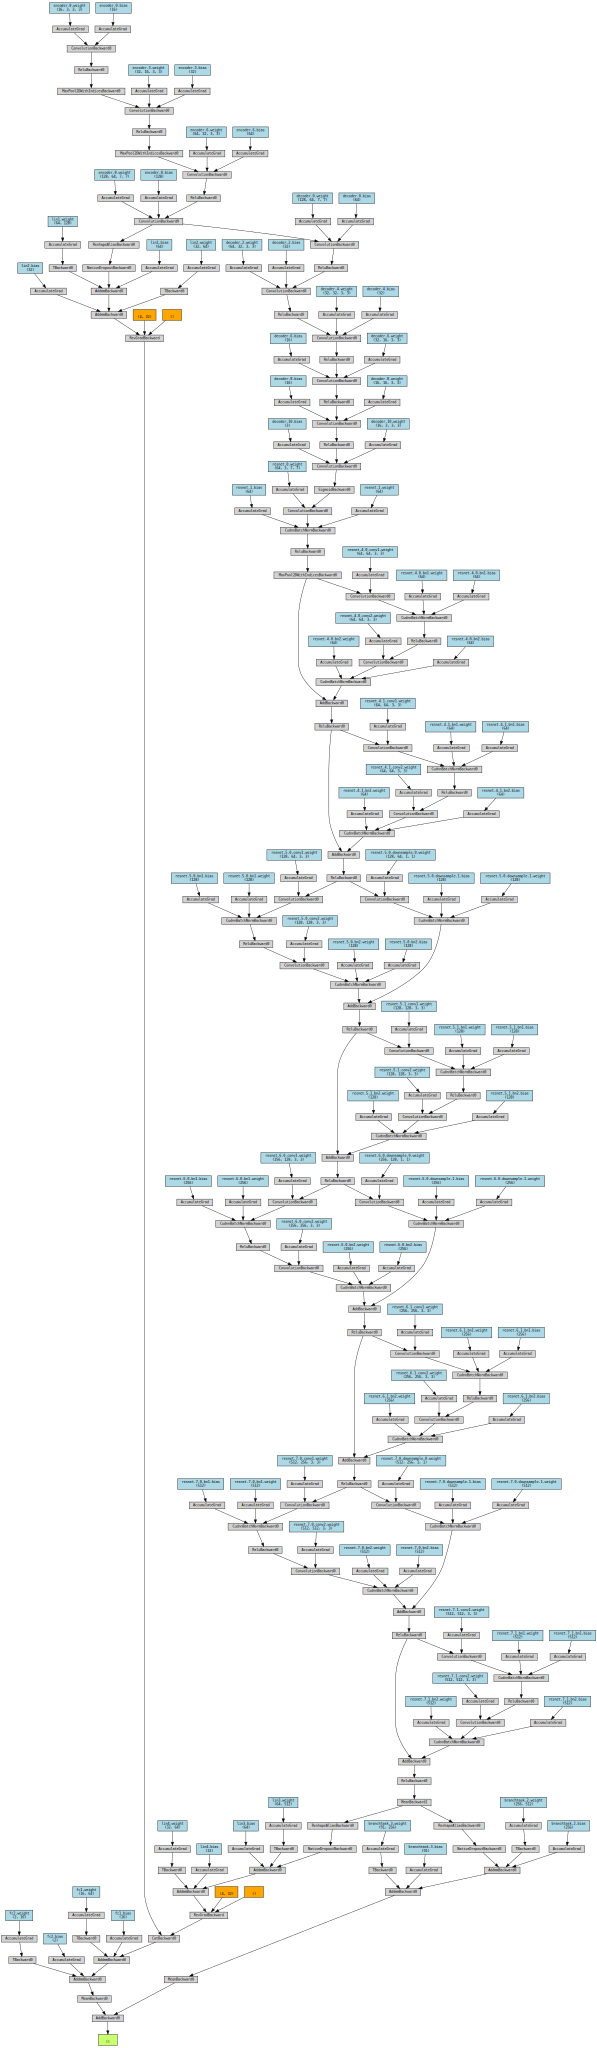

In [112]:
y = model_bm_ae(torch.randn(4,3,224,224).to(device))
make_dot(y[0].mean()+y[1].mean(), params=dict(model_bm_ae.named_parameters()))

In [11]:
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super().__init__()        
#         # N, 3, 224, 224
#         self.encoder = nn.Sequential(
#             nn.Conv2d(3, 16, 3, stride=2, padding=1), # -> N, 16, 112, 112
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2), # -> N, 16, 56, 56
#             nn.Conv2d(16, 32, 3, stride=2, padding=1), # -> N, 32, 28, 28
#             nn.ReLU(),
#             nn.MaxPool2d(2, stride=2), # -> N, 32, 14, 14
#             nn.Conv2d(32, 64, 3, stride=2, padding=1), # -> N, 64, 7, 7
#             nn.ReLU(),
#             nn.Conv2d(64, 128, 7) # -> N, 128, 1, 1
#         )
        
#         # N , 64, 1, 1
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, 7), # -> N, 64, 7, 7
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 14, 14 
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 32, 3, stride=2, padding=1, output_padding=1), # N, 32, 28, 28 
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 56, 56 
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 112, 112 
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1), # N, 3, 224, 224 
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

In [12]:
# ae = Autoencoder()

# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(ae.parameters(),
#                              lr=3e-4, 
#                              weight_decay=1e-5)

# ae.to(device)
# summary(ae,(3,224,224))